In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
print(tf.__version__)


2.7.0


In [3]:
!wget https://www.dropbox.com/s/522skjvhqdkia9d/skincancer_datamerge.zip?dl=0

--2022-02-03 17:34:05--  https://www.dropbox.com/s/522skjvhqdkia9d/skincancer_datamerge.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/522skjvhqdkia9d/skincancer_datamerge.zip [following]
--2022-02-03 17:34:05--  https://www.dropbox.com/s/raw/522skjvhqdkia9d/skincancer_datamerge.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1914409459ddc6c1f26fb7fe4d.dl.dropboxusercontent.com/cd/0/inline/BfC1VngFS6CmiI-BrL019Hb81swFhPskvE7MD06NRarSwpKgFgJeJR65R7te0E7J5MWNBTrfQCwwz9gIP8EDNPzcUJ93doAnoK-T-XoZYlqk7Dcn100N7qpznSJALr0JRcazt0-npo-8tXPo4C1Qkx_e/file# [following]
--2022-02-03 17:34:06--  https://uc1914409459ddc6c1f26fb7fe4d.dl.dropboxusercontent.com/cd/0/inline/BfC1VngFS6CmiI-BrL019Hb81swFhPskvE7MD06NRarSwpKg

In [4]:
!unzip  /content/skincancer_datamerge.zip?dl=0

Archive:  /content/skincancer_datamerge.zip?dl=0
   creating: skincancer_datamerge/cancerdata/
   creating: skincancer_datamerge/cancerdata/benignclass/
  inflating: skincancer_datamerge/cancerdata/benignclass/1.jpg  
  inflating: skincancer_datamerge/cancerdata/benignclass/10.jpg  
  inflating: skincancer_datamerge/cancerdata/benignclass/100.jpg  
  inflating: skincancer_datamerge/cancerdata/benignclass/1000.jpg  
  inflating: skincancer_datamerge/cancerdata/benignclass/1001.jpg  
  inflating: skincancer_datamerge/cancerdata/benignclass/1002.jpg  
  inflating: skincancer_datamerge/cancerdata/benignclass/1003.jpg  
  inflating: skincancer_datamerge/cancerdata/benignclass/1004.jpg  
  inflating: skincancer_datamerge/cancerdata/benignclass/1005.jpg  
  inflating: skincancer_datamerge/cancerdata/benignclass/1006.jpg  
  inflating: skincancer_datamerge/cancerdata/benignclass/1007.jpg  
  inflating: skincancer_datamerge/cancerdata/benignclass/1008.jpg  
  inflating: skincancer_datamerge/can

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [6]:
# counting number of images in two classes

ROOT_DIR = "/content/skincancer_datamerge/cancerdata"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))
number_of_images.items()

dict_items([('malignantclass', 2513), ('benignclass', 2087)])

In [7]:
os.listdir("/content/skincancer_datamerge/cancerdata")

['malignantclass', 'benignclass']

In [8]:
len(os.listdir("/content/skincancer_datamerge/cancerdata"))

2

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:

from zipfile import ZipFile
file_name = "/content/drive/MyDrive/atestset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [11]:

from zipfile import ZipFile
file_name = "/content/drive/MyDrive/atrainset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [12]:

from zipfile import ZipFile
file_name = "/content/drive/MyDrive/avalidset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [13]:
from keras.layers import Conv2D, MaxPool2D, Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras



In [14]:
model = Sequential()
model.add(Conv2D(filters = 16,kernel_size = (3,3),activation = 'relu',input_shape = (224,224,3)))
model.add(Conv2D(filters = 36,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128 ,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(rate = 0.25))


model.add(Flatten())
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 2 , activation = 'softmax'))

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [15]:
model.compile(optimizer = 'adam' , loss = keras.losses.CategoricalCrossentropy()  , metrics = ['accuracy'])

In [16]:
from keras.applications.mobilenet import preprocess_input

In [17]:
def preprocessingImages1(path):
  image_data = ImageDataGenerator(zoom_range = 0.2 ,shear_range=0.2,preprocessing_function=preprocess_input,horizontal_flip=True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224),class_mode ='categorical')
  return image


In [18]:
path = "/content/atrainset"
train_data = preprocessingImages1(path)

Found 3220 images belonging to 2 classes.


In [19]:
def preprocessingImages2(path):
  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224),class_mode = 'categorical')
  return image


In [20]:
path = "/content/atestset"
test_data = preprocessingImages2(path)

Found 690 images belonging to 2 classes.


In [21]:
path = "/content/avalidset"
val_data = preprocessingImages2(path)

Found 690 images belonging to 2 classes.


In [22]:
from keras.callbacks import ModelCheckpoint ,EarlyStopping
es = EarlyStopping(monitor = "val_accuracy" , min_delta =0.01,patience= 6 ,verbose = 1, mode = 'auto')

mc = ModelCheckpoint(monitor = "val_accuracy" , filepath = "./bestmodel.h5",verbose = 1, save_best_only = True,mode = 'auto')

cd = [es,mc]

In [23]:
hs = model.fit_generator(generator=train_data,
                         steps_per_epoch=8,
                         epochs = 5,
                         verbose =1,
                         validation_data = val_data,
                         validation_steps=16,
                         callbacks=cd)

Epoch 1/5
8/8 [==============================] - ETA: 0s - loss: 1.3345 - accuracy: 0.5508
Epoch 00001: val_accuracy improved from -inf to 0.54102, saving model to ./bestmodel.h5
8/8 [==============================] - 15s 570ms/step - loss: 1.3345 - accuracy: 0.5508 - val_loss: 0.6976 - val_accuracy: 0.5410
Epoch 2/5
8/8 [==============================] - ETA: 0s - loss: 0.6067 - accuracy: 0.6602
Epoch 00002: val_accuracy improved from 0.54102 to 0.60742, saving model to ./bestmodel.h5
8/8 [==============================] - 5s 595ms/step - loss: 0.6067 - accuracy: 0.6602 - val_loss: 0.6323 - val_accuracy: 0.6074
Epoch 3/5
8/8 [==============================] - ETA: 0s - loss: 0.6584 - accuracy: 0.6133
Epoch 00003: val_accuracy improved from 0.60742 to 0.79297, saving model to ./bestmodel.h5
8/8 [==============================] - 5s 594ms/step - loss: 0.6584 - accuracy: 0.6133 - val_loss: 0.4799 - val_accuracy: 0.7930
Epoch 4/5
8/8 [==============================] - ETA: 0s - loss: 0.55

In [24]:
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

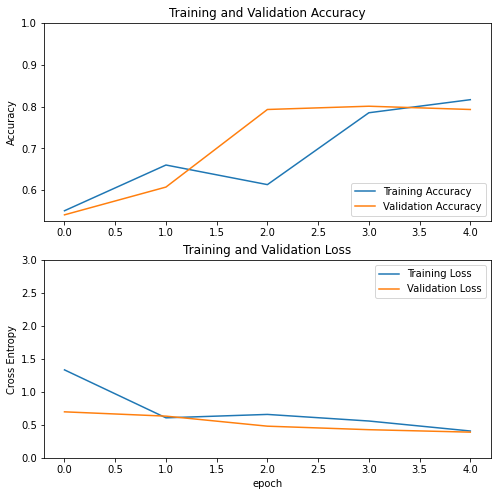

In [25]:
import matplotlib.pyplot as plt

acc = h['accuracy']
val_acc = h['val_accuracy']

loss =h['loss']
val_loss = h['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [26]:
from keras.models import load_model
model = load_model("/content/bestmodel.h5")

In [27]:
acc = model.evaluate_generator(test_data)[1]
print(f"accuracy of our model is {acc*100} %")

accuracy of our model is 78.40579748153687 %


In [28]:
from keras.preprocessing.image import load_img , img_to_array

The image is malignant


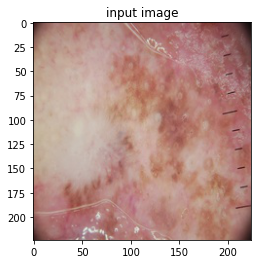

In [29]:
from keras.preprocessing import image
path = "/content/skincancer_datamerge/cancerdata/malignantclass/100.jpg"
img = image.load_img(path , target_size = (224,224))
i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape
pred = np.argmax(model.predict(input_arr))

if pred == 0: 
  print("The image is Benign")
else:
  print("The image is malignant")

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [ ]:
'''
predict_x=model.predict(input_arr) [0][0]
classes_x=np.argmax(predict_x,axis=0)

predict_x
'''



'\npredict_x=model.predict(input_arr) [0][0]\nclasses_x=np.argmax(predict_x,axis=0)\n\npredict_x\n'

In [30]:
train_data.class_indices

{'benignclass': 0, 'malignantclass': 1}

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet

In [32]:
base_model = MobileNet(input_shape=(224,224,3),include_top=False)

17235968/17225924 [==============================] - 0s 0us/step


In [33]:
for layer in base_model.layers:
  layer.trainable  =False

In [34]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [36]:
X= Flatten()(base_model.output)
X= Dense(units = 2,activation='sigmoid')(X)
model = Model(base_model.input ,X)


In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [39]:
model.compile(optimizer  = 'adam' , loss = keras.losses.BinaryCrossentropy(from_logits=True), metrics = ['accuracy'])

In [40]:
from keras.callbacks import ModelCheckpoint , EarlyStopping
mc = ModelCheckpoint(filepath = "bestmodel.h5" , monitor = 'val_accuracy',verbose = 1, save_best_only = True)
es = EarlyStopping(monitor = "val_accuracy" , min_delta = 0.01 , patience = 6,verbose = 1)
cb = [mc,es]

In [41]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=train_data.samples//train_data.batch_size,
                           epochs = 5,
                           validation_data = val_data,
                           validation_steps = val_data.samples//val_data.batch_size,
                           callbacks = cb)


                           

Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 1.0854 - accuracy: 0.7889
Epoch 00001: val_accuracy improved from -inf to 0.81696, saving model to bestmodel.h5
100/100 [==============================] - 40s 383ms/step - loss: 1.0854 - accuracy: 0.7889 - val_loss: 0.7913 - val_accuracy: 0.8170
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 0.4952 - accuracy: 0.8761
Epoch 00002: val_accuracy improved from 0.81696 to 0.90923, saving model to bestmodel.h5
100/100 [==============================] - 38s 382ms/step - loss: 0.4952 - accuracy: 0.8761 - val_loss: 0.3298 - val_accuracy: 0.9092
Epoch 3/5
100/100 [==============================] - ETA: 0s - loss: 0.6391 - accuracy: 0.8739
Epoch 00003: val_accuracy did not improve from 0.90923
100/100 [==============================] - 38s 378ms/step - loss: 0.6391 - accuracy: 0.8739 - val_loss: 0.4778 - val_accuracy: 0.8943
Epoch 4/5
100/100 [==============================] - ETA: 0s - loss: 0.4862 - accur

In [42]:
model = load_model("/content/bestmodel.h5")

In [43]:
acc = model.evaluate_generator(test_data)[1]
print(f"our model accuracy is {acc*100} %")

our model accuracy is 92.02898740768433 %


In [44]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

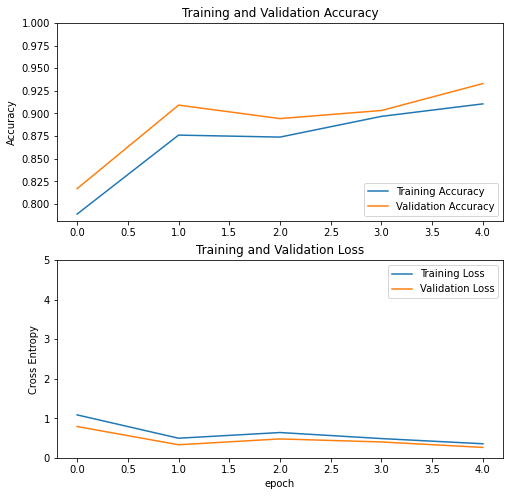

In [45]:
import matplotlib.pyplot as plt

acc = h['accuracy']
val_acc = h['val_accuracy']

loss =h['loss']
val_loss = h['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

The image is Benign


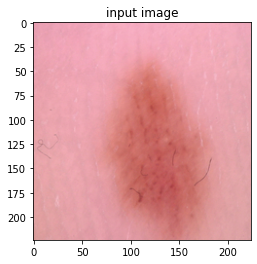

In [67]:
from keras.preprocessing import image
path = "/content/skincancer_datamerge/cancerdata/benignclass/1013.jpg"
img = image.load_img(path , target_size = (224,224))
i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape
pred = np.argmax(model.predict(input_arr))

if pred == 0: 
  print("The image is Benign")
else:
  print("The image is malignant")

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()